In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Exemple: prix de l'électricité en fonction de la température 

Data= pd.read_csv("Installed Capacity per Production Type_202501010000-202601010000.csv")
Data


,Production Type,2025 [MW]
0,Biomass,2654
1,Energy storage,n/e
2,Fossil Brown coal/Lignite,n/e
3,Fossil Coal-derived gas,n/e
4,Fossil Gas,13113
5,Fossil Hard coal,1813
6,Fossil Oil,3040
7,Fossil Oil shale,n/e
8,Fossil Peat,n/e
9,Geothermal,NaN


Problème avec les n/e pour représenter mon fromage du coup je les remplace par NaN avant de faire mon dropna traditionnel

In [29]:
#Remplacement
Data.replace("n/e", pd.NA, inplace=True)

#dropna
Data= Data.dropna()
Data

,Production Type,2025 [MW]
0,Biomass,2654
4,Fossil Gas,13113
5,Fossil Hard coal,1813
6,Fossil Oil,3040
10,Hydro Pumped Storage,5543
11,Hydro Run-of-river and poundage,11641
12,Hydro Water Reservoir,8787
13,Marine,243
14,Nuclear,61370
15,Other,128


In [41]:
TotalCapacity= Data["2025 [MW]"].sum()

In [43]:
TotalCapacity

'265413113181330405543116418787243613701282123824606154176'

In [49]:
#Convertir les strings en floats 

Data["2025 [MW]"]=pd.to_numeric(Data["2025 [MW]"] , errors ='coerce')
Data["2025 [MW]"]

C:\Users\LENOVO T480\AppData\Local\Temp\ipykernel_54040\1542992367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data["2025 [MW]"]=pd.to_numeric(Data["2025 [MW]"] , errors ='coerce')


0       2654
4      13113
5       1813
6       3040
10      5543
11     11641
12      8787
13       243
14     61370
15       128
17     21238
20     24606
21    154176
Name: 2025 [MW], dtype: int64

In [59]:
Parts= (Data["2025 [MW]"]/154176)*100
Parts

0       1.721409
4       8.505215
5       1.175929
6       1.971773
10      3.595242
11      7.550462
12      5.699331
13      0.157612
14     39.805158
15      0.083022
17     13.775166
20     15.959682
21    100.000000
Name: 2025 [MW], dtype: float64

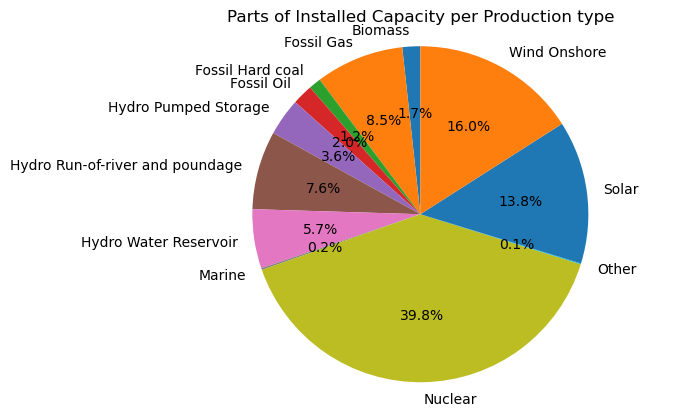

In [73]:
labels = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Hydro Pumped Storage', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir',	'Marine', 'Nuclear', 'Other', 'Solar', 'Wind Onshore']
parts=  [1.721409 , 8.505215, 1.175929, 1.971773, 3.595242, 7.550462, 5.699331, 0.157612, 39.805158, 0.083022, 13.775166, 15.959682]

plt.pie(parts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Parts of Installed Capacity per Production type")
plt.axis('equal') #Pour garder le cercle rond et ne pas avoir d'ellipse
plt.show()


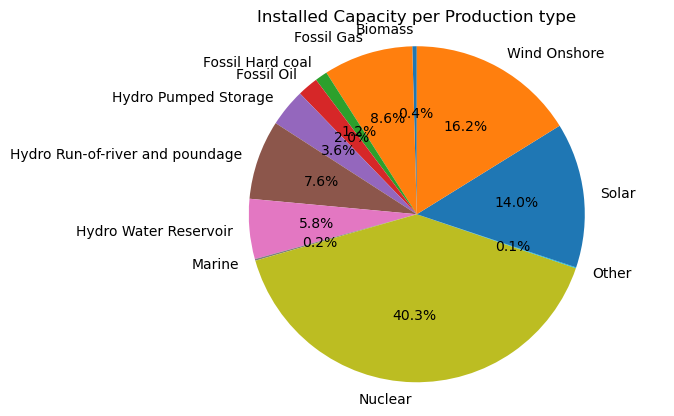

In [85]:
#En Puissance

labels = ['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Hydro Pumped Storage', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir',	'Marine', 'Nuclear', 'Other', 'Solar', 'Wind Onshore']
parts = [654, 13113, 1813, 3040, 5543, 11641, 8787, 243, 61370, 128, 21238, 24606]

plt.pie(parts , labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Installed Capacity per Production type")
plt.axis('equal') #Pour garder le cercle rond et ne pas avoir d'ellipse
plt.show()
